### Case Study 1

Build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature as closely as possible. 

contains two files `train.csv` and `unique_m.csv`. The former file has 81 features for 21,263 superconducting materials with the superconducting critical temperature given in the 82nd column. Some of the feature columns have prefixes, which are "wtd" for weighted, "gmean" for geometric mean, and "std" for standard deviation. The latter file has the chemical formulas comprising each of the 21,263 superconducting materials, i.e. the specific ratios of elements, given in a format that is not entirely dissimilar to one-hot encoding. The data was derived from many separate studies, but each should be held as equally reliable.


### Import Libraries

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt


### Read In Data

In [2]:
train_df = pd.read_csv('superconduct/train.csv')
unique_df = pd.read_csv('superconduct/unique_m.csv')
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [3]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              21263 non-null  float64
 1   He             21263 non-null  int64  
 2   Li             21263 non-null  float64
 3   Be             21263 non-null  float64
 4   B              21263 non-null  float64
 5   C              21263 non-null  float64
 6   N              21263 non-null  float64
 7   O              21263 non-null  float64
 8   F              21263 non-null  float64
 9   Ne             21263 non-null  int64  
 10  Na             21263 non-null  float64
 11  Mg             21263 non-null  float64
 12  Al             21263 non-null  float64
 13  Si             21263 non-null  float64
 14  P              21263 non-null  float64
 15  S              21263 non-null  float64
 16  Cl             21263 non-null  float64
 17  Ar             21263 non-null  int64  
 18  K     

In [3]:
# merge the dataframes on the index
df = pd.merge(train_df, unique_df, on='critical_temp')
#df = df.drop(columns=['critical_temp'])
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Sr0.2La1.8Cu0.99Zn0.01O4
2,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,Bi2Sr2Ca0.5Lu0.5Cu2O8
3,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,Ba0.6K0.4Bi1O3
4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,Ba0.7K0.75Bi1O


In [5]:
print(df['critical_temp'])


0          29.000
1          29.000
2          29.000
3          29.000
4          29.000
           ...   
715602      0.785
715603      1.585
715604      1.445
715605      1.165
715606    122.100
Name: critical_temp, Length: 715607, dtype: float64


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715607 entries, 0 to 715606
Data columns (total 169 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    number_of_elements               int64  
 1    mean_atomic_mass                 float64
 2    wtd_mean_atomic_mass             float64
 3    gmean_atomic_mass                float64
 4    wtd_gmean_atomic_mass            float64
 5    entropy_atomic_mass              float64
 6    wtd_entropy_atomic_mass          float64
 7    range_atomic_mass                float64
 8    wtd_range_atomic_mass            float64
 9    std_atomic_mass                  float64
 10   wtd_std_atomic_mass              float64
 11   mean_fie                         float64
 12   wtd_mean_fie                     float64
 13   gmean_fie                        float64
 14   wtd_gmean_fie                    float64
 15   entropy_fie                      float64
 16   wtd_entropy_fie                  flo

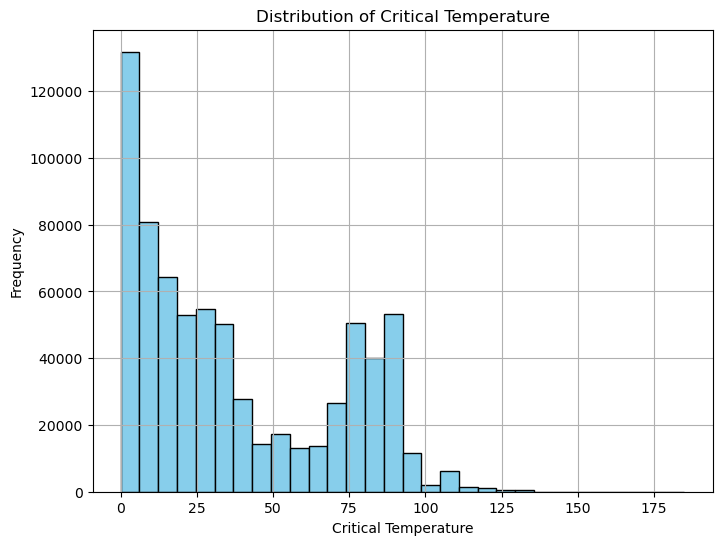

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of 'critical_temp'
plt.figure(figsize=(8, 6))
plt.hist(df['critical_temp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('temp_histogram.png')
plt.show()

In [13]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,...,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.000000,715607.0,715607.0,715607.0
mean,4.393901,84.061425,67.067917,66.781272,51.354244,1.234432,1.150145,122.918054,28.901385,46.212534,...,0.037289,0.021569,0.010012,0.037346,0.050811,0.040810,0.218683,0.0,0.0,0.0
std,1.347642,25.514160,27.446798,25.156138,29.485017,0.336227,0.366257,50.977053,20.612992,18.391209,...,0.536597,0.245789,0.418563,0.197928,0.272593,0.278939,0.672748,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.324650,51.536371,57.036053,34.999971,1.062065,0.957373,91.728461,15.508794,38.356475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,5.000000,83.244760,57.990286,64.868369,36.671659,1.311510,1.224778,122.906070,24.730550,46.482335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,95.578967,77.690332,73.259860,65.478315,1.448003,1.401216,157.958111,35.922804,59.663892,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


In [4]:
non_unique_columns = df.columns[df.nunique() == 1]

# Print the columns with no unique values
if len(non_unique_columns) > 0:
    print("Columns with no unique values:", non_unique_columns)
else:
    print("All columns have unique values.")

Columns with no unique values: Index(['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn'], dtype='object')


In [5]:
df.drop(columns=non_unique_columns)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ba0.2La1.8Cu1O4
1,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sr0.2La1.8Cu0.99Zn0.01O4
2,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Bi2Sr2Ca0.5Lu0.5Cu2O8
3,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ba0.6K0.4Bi1O3
4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ba0.7K0.75Bi1O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715602,3,129.169293,117.819960,122.162273,109.219524,1.045523,0.951196,101.98788,47.555960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ta1Se1.7Te0.3
715603,3,129.169293,125.926627,122.162273,118.315289,1.045523,1.053047,101.98788,28.731960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ta1Se1.2Te0.8
715604,3,129.169293,129.169293,122.162273,122.162273,1.045523,1.045523,101.98788,33.995960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ta1Se1Te1
715605,3,129.169293,132.411960,122.162273,126.134340,1.045523,1.018042,101.98788,39.259960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ta1Se0.8Te1.2


In [10]:
critical_temp_corr = sorted_matrix.loc[['critical_temp']]
critical_temp_corr.tail(15)

critical_temp  Cu                             0.527692
               gmean_Valence                  0.534508
               entropy_Valence                0.536343
               range_fie                      0.540926
               wtd_entropy_atomic_radius      0.546226
               wtd_std_atomic_radius          0.546276
               mean_Valence                   0.561983
               wtd_entropy_atomic_mass        0.562504
               wtd_gmean_Valence              0.581195
               wtd_mean_Valence               0.596796
               range_atomic_radius            0.599101
               std_ThermalConductivity        0.603663
               range_ThermalConductivity      0.627671
               wtd_std_ThermalConductivity    0.671612
               critical_temp                  1.000000
dtype: float64

In [16]:
corr_features = ['wtd_std_ThermalConductivity', 'range_atomic_radius', 'wtd_mean_Valence', 'wtd_entropy_atomic_mass', 'number_of_elements', 'Cu'] 

In [20]:
correlation_matrix

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
number_of_elements,1.000000,-0.025207,-0.273099,-0.178130,-0.384395,0.941543,0.874806,0.635088,-0.304751,0.463137,...,-0.068883,-0.055054,-0.022805,0.084300,0.076733,0.005848,0.075860,NaN,NaN,NaN
mean_atomic_mass,-0.025207,1.000000,0.755655,0.927901,0.650559,0.000891,0.049796,0.302222,0.368692,0.367135,...,0.030982,0.018484,0.012938,0.013289,0.004007,0.014810,0.011828,NaN,NaN,NaN
wtd_mean_atomic_mass,-0.273099,0.755655,1.000000,0.798642,0.950918,-0.238228,-0.326095,-0.020744,0.711596,0.053057,...,0.055767,0.038290,0.021584,-0.024365,-0.024117,0.013210,-0.014926,NaN,NaN,NaN
gmean_atomic_mass,-0.178130,0.927901,0.798642,1.000000,0.793864,-0.079655,-0.084932,-0.023783,0.380032,0.021121,...,0.041326,0.028323,0.017256,-0.010450,-0.014292,0.013342,-0.007962,NaN,NaN,NaN
wtd_gmean_atomic_mass,-0.384395,0.650559,0.950918,0.793864,1.000000,-0.306922,-0.405117,-0.269881,0.647968,-0.202995,...,0.060299,0.043591,0.023851,-0.036968,-0.033182,0.012372,-0.028594,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,0.005848,0.014810,0.013210,0.013342,0.012372,0.002024,0.006326,0.007436,0.004303,0.007802,...,-0.010167,-0.007827,0.001611,0.000143,-0.007801,1.000000,0.052463,NaN,NaN,NaN
Bi,0.075860,0.011828,-0.014926,-0.007962,-0.028594,0.065012,0.075419,0.075821,-0.027681,0.063708,...,-0.021296,-0.027640,-0.005630,-0.053102,-0.055237,0.052463,1.000000,NaN,NaN,NaN
Po,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
At,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Remove highly correlated columns from the DataFrame
df_filtered = df.drop(columns=highly_correlated_columns)
df_filtered

,He,Ne,Ar,Kr,Xe,Pm,Po,At,Rn
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
715602,0,0,0,0,0,0,0,0,0
715603,0,0,0,0,0,0,0,0,0
715604,0,0,0,0,0,0,0,0,0
715605,0,0,0,0,0,0,0,0,0


/Users/carolinacraus/anaconda3/envs/quant-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolinacraus/anaconda3/envs/quant-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolinacraus/anaconda3/envs/quant-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/carolinacraus/anaconda3/envs/quant-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

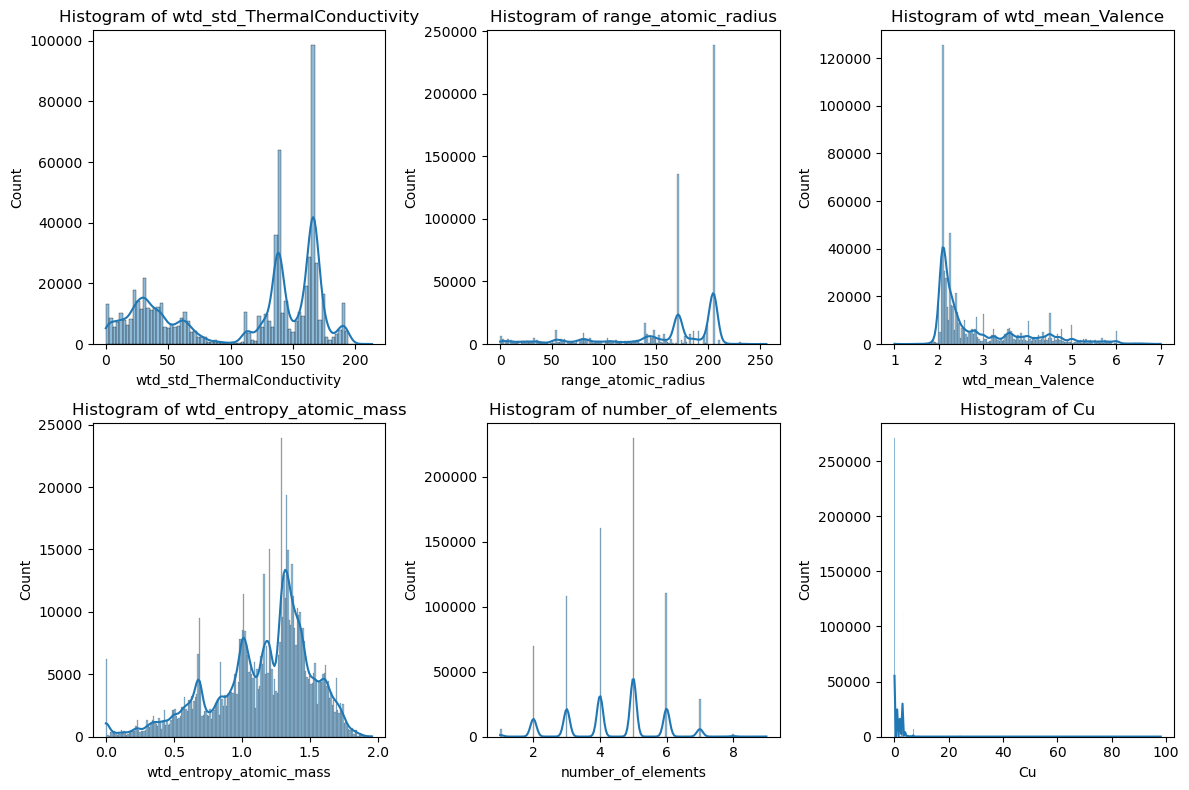

In [17]:
df_selected = df[corr_features]

# Create a grid of histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(corr_features):
    plt.subplot(2, 3, i+1) 
    sns.histplot(df_selected[feature], kde=True)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

#### Scale Features

In [6]:
df = df.drop(['material'], axis=1)
target = ['critical_temp']
features = df.loc[:, ~df.columns.isin(target)].columns
X = df[features]
y=df[target]
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
3,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
4,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715602,3,129.169293,117.819960,122.162273,109.219524,1.045523,0.951196,101.98788,47.555960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
715603,3,129.169293,125.926627,122.162273,118.315289,1.045523,1.053047,101.98788,28.731960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
715604,3,129.169293,129.169293,122.162273,122.162273,1.045523,1.045523,101.98788,33.995960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
715605,3,129.169293,132.411960,122.162273,126.134340,1.045523,1.018042,101.98788,39.259960,41.651162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [12]:
y

,critical_temp
0,29.000
1,29.000
2,29.000
3,29.000
4,29.000
...,...
715602,0.785
715603,1.585
715604,1.445
715605,1.165


In [7]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled,columns = X.columns)

X_scaled


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-0.292289,0.191386,-0.335385,-0.016683,-0.516793,-0.156551,-0.239584,-0.000235,0.140374,0.312992,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,-0.325060,0.0,0.0,0.0
1,-0.292289,0.191386,-0.335385,-0.016683,-0.516793,-0.156551,-0.239584,-0.000235,0.140374,0.312992,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,-0.325060,0.0,0.0,0.0
2,-0.292289,0.191386,-0.335385,-0.016683,-0.516793,-0.156551,-0.239584,-0.000235,0.140374,0.312992,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,2.647825,0.0,0.0,0.0
3,-0.292289,0.191386,-0.335385,-0.016683,-0.516793,-0.156551,-0.239584,-0.000235,0.140374,0.312992,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,1.161382,0.0,0.0,0.0
4,-0.292289,0.191386,-0.335385,-0.016683,-0.516793,-0.156551,-0.239584,-0.000235,0.140374,0.312992,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,1.161382,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715602,-1.034326,1.767956,1.849107,2.201492,1.962533,-0.561849,-0.543196,-0.410581,0.904992,-0.248019,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,-0.325060,0.0,0.0,0.0
715603,-1.034326,1.767956,2.144467,2.201492,2.271021,-0.561849,-0.265107,-0.410581,-0.008219,-0.248019,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,-0.325060,0.0,0.0,0.0
715604,-1.034326,1.767956,2.262611,2.201492,2.401494,-0.561849,-0.285650,-0.410581,0.247154,-0.248019,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,-0.325060,0.0,0.0,0.0
715605,-1.034326,1.767956,2.380754,2.201492,2.536208,-0.561849,-0.360684,-0.410581,0.502527,-0.248019,...,-0.069492,-0.087756,-0.023919,-0.188687,-0.186401,-0.146303,-0.325060,0.0,0.0,0.0


In [18]:
correlation_matrix = X_scaled.corr()
sorted_mat = correlation_matrix.unstack().abs().sort_values() 
sorted_matrix = sorted_mat.dropna()
sorted_matrix.tail(20)

Ca  Ca    1.0
Ti  Ti    1.0
Y   Y     1.0
Sr  Sr    1.0
Rb  Rb    1.0
Br  Br    1.0
Se  Se    1.0
As  As    1.0
Ge  Ge    1.0
Sc  Sc    1.0
Ga  Ga    1.0
Cu  Cu    1.0
Ni  Ni    1.0
Co  Co    1.0
Fe  Fe    1.0
Mn  Mn    1.0
Cr  Cr    1.0
V   V     1.0
Zn  Zn    1.0
Bi  Bi    1.0
dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression 
scaled_model = LinearRegression()
scaled_model.fit(X_scaled,y)

LinearRegression()

In [45]:
for i in range(len(X_scaled.columns)):
    print(X_scaled.columns[i], scaled_model.coef_[i])

number_of_elements [-2.24437390e+00  1.72250526e+01 -2.17468775e+01 -1.06872847e+01
  1.79243525e+01 -3.69782993e+00 -3.22918240e+00  9.30564421e+00
 -5.02930880e-01 -7.66695629e+00  2.22911020e+00 -3.82376403e+00
  3.50674410e+00  3.14154569e+00  1.16335295e+00 -1.63303663e+01
  1.06062350e+01  1.23925478e+01  3.96709816e+00 -1.18828867e+01
 -4.97420663e+00  4.29419297e+00  4.34407212e+01 -8.73022278e+00
 -4.40655135e+01  3.13862677e+00  1.14638775e+01  7.09477985e+00
 -2.35655688e+00 -1.02958690e+01  2.13053152e+00 -1.21603396e+01
  4.29368623e+00  6.71977435e+00  1.27155476e+00  2.13973626e+00
 -2.60951608e+00 -6.02465213e+00 -2.20244285e-01  9.82748957e+00
 -3.78702636e+00  9.58556532e-01  7.46448476e+00  3.17950068e-02
 -9.14744742e+00  5.05331154e+00 -5.13771257e+00 -1.58241186e+01
 -3.87284090e+00  1.95484049e+01 -6.32427405e+00  1.54871034e+01
 -1.52659241e+01 -1.23529630e+01  1.16944294e+01 -5.56251499e+00
  6.44243582e+00 -5.20709246e+00  3.98293181e+00 -4.27138114e+00
  2.99

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:

l1_model = Lasso(alpha=1)

alpha=1
for i in range(5):
    l1_model.alpha=alpha
    l1_model.fit(X_scaled,y)
    print(alpha)
    print(cross_val_score(l1_model, X_scaled, y))
    print(l1_model.coef_)
    print("------")
    alpha = alpha/10

1
[0.5282424  0.53643114 0.51549462 0.61434319 0.24303855]
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.54711980e+00  2.20303014e+00
 -5.01803442e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.68751790e+00
 -7.84011330e-01  0.00000000e+00  0.00000000e+00 -8.76182773e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.05672449e-01
 -2.77768627e+00 -0.00000000e+00 -1.27625266e-01  0.00000000e+00
  0.00000000e+00  1.26425935e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+0

In [14]:
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Lasso
import numpy as np 

alphas = [0.1, 1, 10, 100, 1000]

# Initialize variables to keep track of the best alpha and mean cross-validation score
best_alpha = None
best_score = -np.inf  # Initialize with negative infinity to ensure any score is an improvement

# Loop over alpha values
for alpha in alphas:
    # Create Lasso model with the current alpha
    l1_model = Lasso(alpha=alpha)
    
    # Perform cross-validation and calculate the mean score
    scores = cross_val_score(l1_model, X_scaled, y, cv=5)
    mean_score = np.mean(scores)
    
    print(f"Alpha: {alpha}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {mean_score}")
    
    # Check if the current alpha performs better than the best one so far
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha
    
    print("------")

print(f"Best Alpha: {best_alpha}")
print(f"Best Mean Cross-validation Score: {best_score}")

Alpha: 0.1
Cross-validation scores: [0.59706383 0.59358701 0.58475395 0.68168831 0.35960713]
Mean score: 0.5633400431425108
------
Alpha: 1
Cross-validation scores: [0.5282424  0.53643114 0.51549462 0.61434319 0.24303855]
Mean score: 0.4875099806355664
------
Alpha: 10
Cross-validation scores: [ 0.22410157  0.26607961  0.03751175  0.32916063 -1.28812447]
Mean score: -0.08625418115892658
------
Alpha: 100
Cross-validation scores: [-0.1863932  -0.15014428 -0.6505522  -0.13231696 -3.30956441]
Mean score: -0.8857942098694774
------
Alpha: 1000
Cross-validation scores: [-0.1863932  -0.15014428 -0.6505522  -0.13231696 -3.30956441]
Mean score: -0.8857942098694774
------
Best Alpha: 0.1
Best Mean Cross-validation Score: 0.5633400431425108


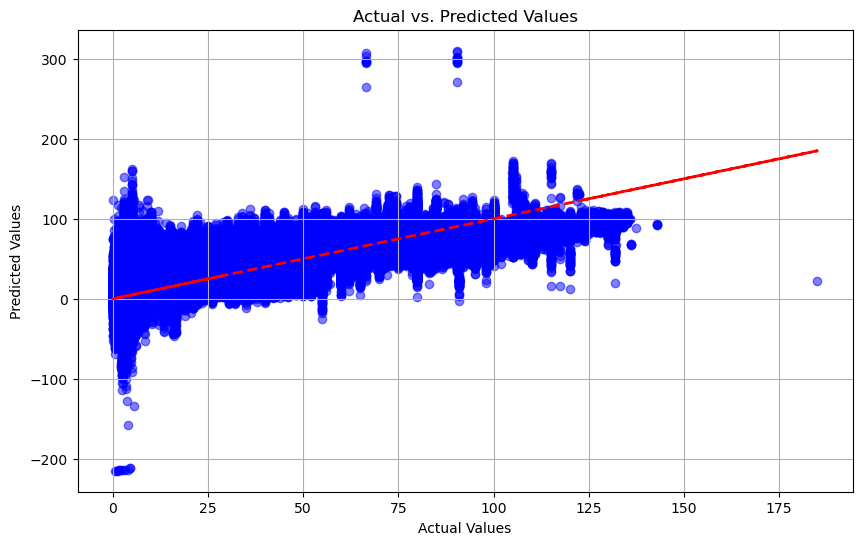

In [18]:
best_alpha = 0.1 

lasso_model = Lasso(alpha=best_alpha)

# Get predicted values using cross-validation
predicted_values = cross_val_predict(lasso_model, X_scaled, y, cv=5)

# Plot actual vs. predicted values for all points
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='b', alpha=0.5)
plt.plot(y, y, '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

### L2 Regularization 

In [20]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10, 100, 1000]

# Initialize variables to keep track of the best alpha and mean cross-validation score
best_alpha = None
best_score = -np.inf  # Initialize with negative infinity to ensure any score is an improvement

# Loop over alpha values
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_scaled, y, cv=5)
    mean_score = np.mean(scores)
    
    print(f"Alpha: {alpha}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {mean_score}")
    
    # Check if the current alpha performs better than the best one so far
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha
    
    print("------")

print(f"Best Alpha: {best_alpha}")
print(f"Best Mean Cross-validation Score: {best_score}")

Alpha: 0.1
Cross-validation scores: [-0.33391872  0.61901511  0.61515148  0.69691439  0.19692612]
Mean score: 0.3588176753779258
------
Alpha: 1
Cross-validation scores: [-0.33352533  0.61903244  0.61516971  0.69691977  0.19719741]
Mean score: 0.3589587996511264
------
Alpha: 10
Cross-validation scores: [-0.32953717  0.61916028  0.61528387  0.69694919  0.19910484]
Mean score: 0.3601922031755075
------
Alpha: 100
Cross-validation scores: [-0.29015753  0.61939686  0.61507395  0.69677709  0.20492961]
Mean score: 0.3692039941644468
------
Alpha: 1000
Cross-validation scores: [0.00200935 0.6165977  0.61125781 0.6944564  0.2178354 ]
Mean score: 0.42843133055138916
------
Best Alpha: 1000
Best Mean Cross-validation Score: 0.42843133055138916


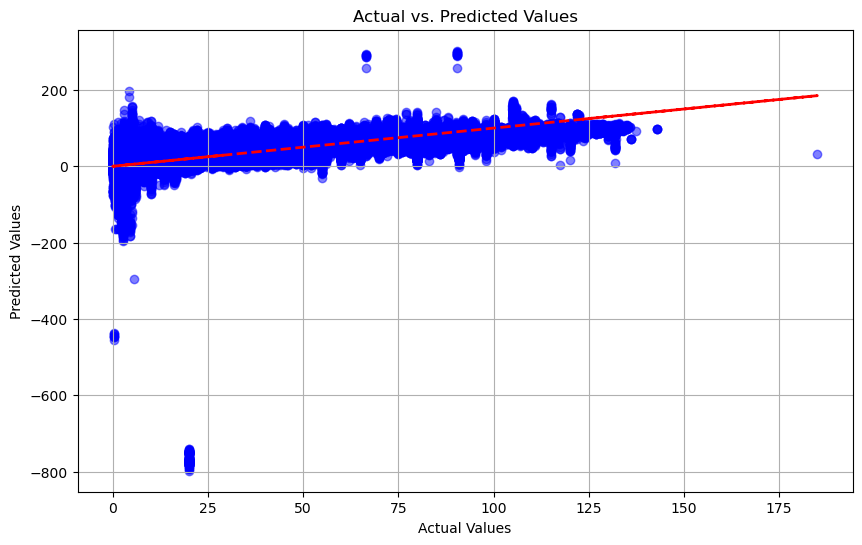

In [21]:
best_alpha = 1000 

ridge_model = Ridge(alpha=best_alpha)

# Get predicted values using cross-validation
predicted_values = cross_val_predict(ridge_model, X_scaled, y, cv=5)

# Plot actual vs. predicted values for all points
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='b', alpha=0.5)
plt.plot(y, y, '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [11]:
from sklearn.linear_model import ElasticNet
import numpy as np

alphas = [0.1, 1, 10, 100, 1000]

# List of l1_ratio values to try (l1_ratio = 0 corresponds to L2 regularization, l1_ratio = 1 corresponds to L1 regularization)
l1_ratios = [0.1, 0.5, 0.7, 0.9, 1.0]

best_alpha = None
best_l1_ratio = None
best_score = -np.inf  

for alpha in alphas:
    for l1_ratio in l1_ratios:
        # Create Elastic Net model with the current alpha and l1_ratio
        elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        
        scores = cross_val_score(elastic_net_model, X_scaled, y, cv=5)
        mean_score = np.mean(scores)
        
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
        print(f"Cross-validation scores: {scores}")
        print(f"Mean score: {mean_score}")
        
        if mean_score > best_score:
            best_score = mean_score
            best_alpha = alpha
            best_l1_ratio = l1_ratio
        
        print("------")

print(f"Best Alpha: {best_alpha}")
print(f"Best L1 Ratio: {best_l1_ratio}")
print(f"Best Mean Cross-validation Score: {best_score}")

final_elastic_net_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
final_elastic_net_model.fit(X_scaled, y)

Alpha: 0.1, L1 Ratio: 0.1
Cross-validation scores: [0.57987554 0.582727   0.57570036 0.66883659 0.30498767]
Mean score: 0.5424254310044069
------
Alpha: 0.1, L1 Ratio: 0.5
Cross-validation scores: [0.5845859  0.58644193 0.57876106 0.67360069 0.32664168]
Mean score: 0.5500062499616329
------
Alpha: 0.1, L1 Ratio: 0.7
Cross-validation scores: [0.58756601 0.58851344 0.58020799 0.67623331 0.33875372]
Mean score: 0.554254893616225
------
Alpha: 0.1, L1 Ratio: 0.9
Cross-validation scores: [0.59258853 0.59116808 0.58292856 0.67943807 0.35262776]
Mean score: 0.5597501989430096
------
Alpha: 0.1, L1 Ratio: 1.0
Cross-validation scores: [0.59706383 0.59358701 0.58475395 0.68168831 0.35960713]
Mean score: 0.5633400431425108
------
Alpha: 1, L1 Ratio: 0.1
Cross-validation scores: [0.48816741 0.5052714  0.49562973 0.59804768 0.26399206]
Mean score: 0.47022165446230596
------
Alpha: 1, L1 Ratio: 0.5
Cross-validation scores: [0.49469624 0.51056046 0.49642076 0.60088579 0.24177309]
Mean score: 0.468867

ElasticNet(alpha=0.1, l1_ratio=1.0)

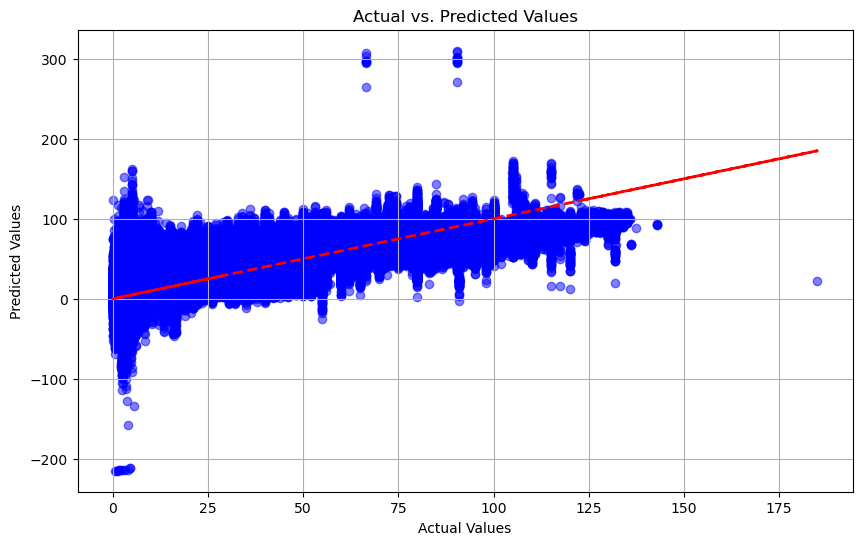

In [16]:
# Get predicted values using cross-validation
predicted_values = cross_val_predict(final_elastic_net_model, X_scaled, y, cv=5)

# Plot actual vs. predicted values for all points
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, color='b', alpha=0.5)
plt.plot(y, y, '--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [17]:
model_results = pd.DataFrame(predicted_values)
model_results.loc['MEAN'] = model_results.mean()

In [20]:
feature_names = X_scaled.columns.tolist()

feature_coefficients = final_elastic_net_model.coef_

# new df with feature names and their coeffs
feature_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_coefficients})

# Sort by absolute coefficients in descending order
feature_df = feature_df.reindex(feature_df['Coefficient'].abs().sort_values(ascending=False).index)
top_10_features = feature_df.head(10)

top_10_features

,Feature,Coefficient
136,Ba,11.035727
62,wtd_mean_ThermalConductivity,8.561095
7,range_atomic_mass,6.845027
64,wtd_gmean_ThermalConductivity,-6.648629
49,std_ElectronAffinity,6.271378
47,range_ElectronAffinity,-4.878852
94,Si,-4.272386
80,wtd_std_Valence,-4.082574
118,Sr,3.921893
100,Ca,3.689896


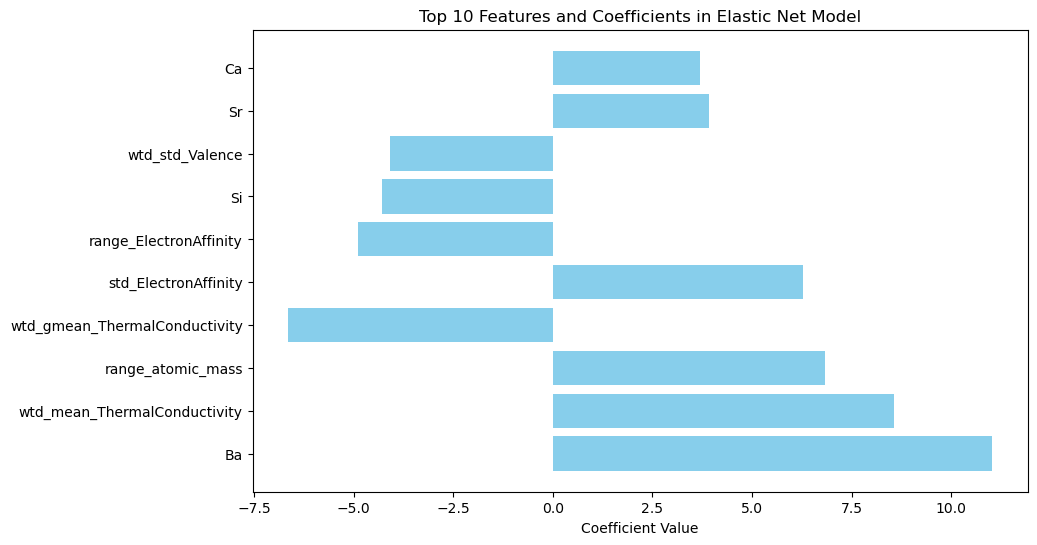

In [21]:
# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Features and Coefficients in Elastic Net Model')
plt.show()